# Bitcoin REST API

In [89]:
!pip install pycoingecko
from pycoingecko import CoinGeckoAPI
cg=CoinGeckoAPI()
bitcoin_data=cg.get_coin_market_chart_by_id(id = 'bitcoin', vs_currency = 'eur', days = '30')

In [90]:
import pandas as pd
import plotly.graph_objects as go

In [91]:
data = pd.DataFrame(bitcoin_data['prices'], columns=['TimeStamp','Price'])

In [92]:
data['Date']=pd.to_datetime(data['TimeStamp'],unit='ms')

Now we create a candlestick plot

In [93]:
candlestick_data=data.groupby(data.Date.dt.date).agg({'Price':['min','max','first','last']})

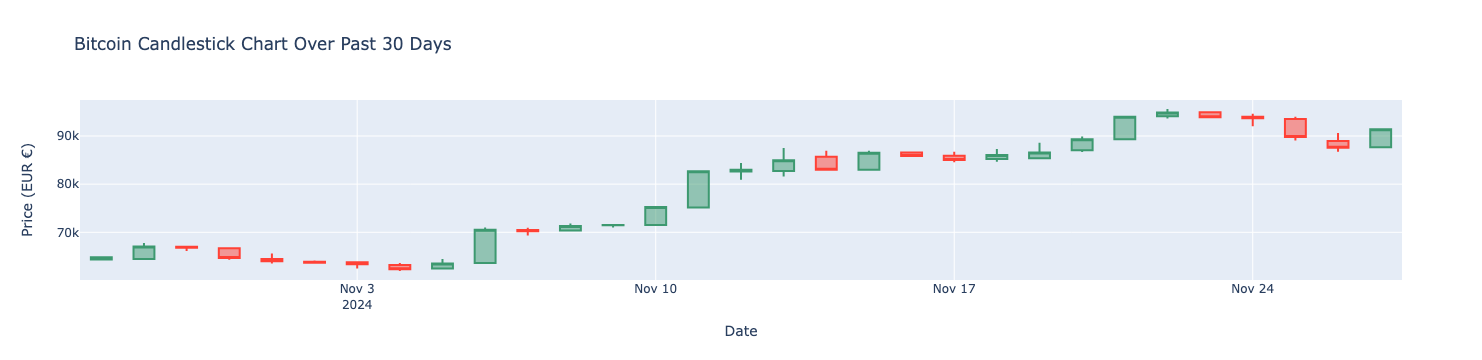

In [94]:
plotlyfig = go.Figure(data=[go.Candlestick(x=candlestick_data.index,
                                                 open = candlestick_data['Price']['first'],
                                                 high = candlestick_data['Price']['max'],
                                                 low = candlestick_data['Price']['min'],
                                                 close = candlestick_data['Price']['last'])
                                  ])
plotlyfig.update_layout(xaxis_rangeslider_visible=False, 
                       xaxis_title = 'Date',
                       yaxis_title = 'Price (EUR €)',
                       title = 'Bitcoin Candlestick Chart Over Past 30 Days')

# NBA example

In [22]:
!pip install nba_api
from nba_api.stats.static import teams
import matplotlib.pyplot as plt

  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.41 requires requests_mock, which is not installed.
spyder 5.4.3 requires pyqt5<5.16, which is not installed.
spyder 5.4.3 requires pyqtwebengine<5.16, which is not installed.
conda-repo-cli 1.0.41 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.41 requires nbformat==5.4.0, but you have nbformat 5.7.0 which is incompatible.
conda-repo-cli 1.0.41 requires python-dateutil==2.8.2, but you have python-dateutil 2.9.0.post0 which is incompatible.
conda-repo-cli 1.0.41 requires requests==2.28.1, but you have requests 2.32.3 which is incompatible.
spyder 5.4.3 requires jedi<0.19.0,>=0.17.2, but you ha

In [23]:
def one_dict(list_dict):
    keys = list_dict[0].keys()
    out_dict = {key:[] for key in keys}
    for dict_ in list_dict:
        for key, value in dict_.items():
            out_dict[key].append(value)
    return out_dict

In [24]:
nba_teams=teams.get_teams()

In [26]:
nba_teams[0:3]

[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Georgia',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970}]

In [30]:
dict_nba_teams=one_dict(nba_teams)
df_teams = pd.DataFrame(dict_nba_teams)
df_teams.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Georgia,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


In [32]:
df_warriors = df_teams[df_teams['nickname']=='Warriors']
df_warriors

,id,full_name,abbreviation,nickname,city,state,year_founded
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946


In [36]:
id_warriors = df_warriors[['id']].values[0][0]
id_warriors

1610612744

In [37]:
from nba_api.stats.endpoints import leaguegamefinder

In [40]:
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id_warriors)

In [41]:
import requests

filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/Chapter%205/Labs/Golden_State.pkl"

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)

download(filename, "Golden_State.pkl")

In [42]:
file_name = "Golden_State.pkl"
games = pd.read_pickle(file_name)
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22019,1610612744,GSW,Golden State Warriors,1521900066,2019-07-12,GSW vs. LAL,L,200,87,...,0.800,13.0,29.0,42.0,13,10.0,3,11.0,21,3.2
1,22019,1610612744,GSW,Golden State Warriors,1521900058,2019-07-10,GSW @ DEN,W,201,73,...,0.867,7.0,27.0,34.0,10,11.0,7,20.0,20,-8.0
2,22019,1610612744,GSW,Golden State Warriors,1521900039,2019-07-08,GSW @ LAL,W,200,88,...,0.621,8.0,29.0,37.0,21,10.0,4,13.0,22,8.0
3,22019,1610612744,GSW,Golden State Warriors,1521900020,2019-07-07,GSW vs. TOR,W,201,80,...,0.923,6.0,37.0,43.0,18,8.0,3,20.0,25,10.0
4,22019,1610612744,GSW,Golden State Warriors,1521900007,2019-07-05,GSW vs. CHA,L,200,85,...,0.889,8.0,28.0,36.0,19,9.0,3,13.0,15,-8.0


In [43]:
games_home=games[games['MATCHUP']=='GSW vs. TOR']
games_away=games[games['MATCHUP']=='GSW @ TOR']

In [44]:
games_home['PLUS_MINUS'].mean()

3.730769230769231

In [45]:
games_away['PLUS_MINUS'].mean()

-0.6071428571428571

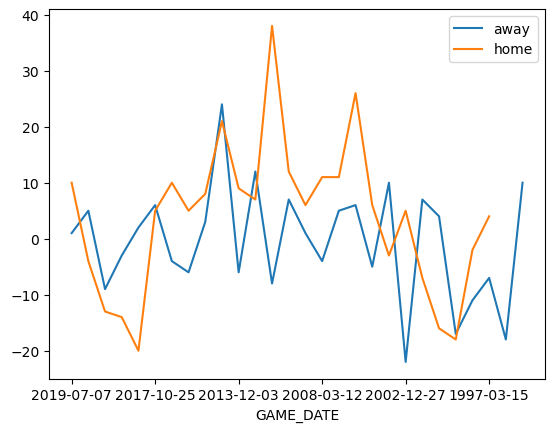

In [46]:
fig, ax = plt.subplots()

games_away.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
games_home.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
ax.legend(["away", "home"])
plt.show()

In [47]:
games_home['PTS'].mean()

106.8076923076923

In [48]:
games_away['PTS'].mean()

102.96428571428571

# GDP Data Extraction and Processing

In [66]:
!pip install lxml
import numpy as np

In [51]:
def warn(*args,**kwargs):
    pass
import warnings
warnings.warn=warn
warnings.filterwarnings('ignore')

We extract the GDP data from wikipedia 

In [52]:
URL="https://web.archive.org/web/20230902185326/https://en.wikipedia.org/wiki/List_of_countries_by_GDP_%28nominal%29"

In [63]:
# We can webscape the wikpedia page with pandas
tables = pd.read_html(URL)
df = tables[3]

# Replace column headers with column numbers
df.columns = range(df.shape[1])

df=df[[0,2]]
df = df.iloc[1:11,:]
df.columns = ['Country GDP', 'GDP (Million USD)']


In [67]:
# Change the data type of the 'GDP (Million USD)' column to integer. Use astype() method.
df['GDP (Million USD)'] = df['GDP (Million USD)'].astype(int)

# Convert the GDP value in Million USD to Billion USD
df[['GDP (Million USD)']] = df[['GDP (Million USD)']]/1000

# Use numpy.round() method to round the value to 2 decimal places.
df[['GDP (Million USD)']] = np.round(df[['GDP (Million USD)']], 2)

# Rename the column header from 'GDP (Million USD)' to 'GDP (Billion USD)'
df.rename(columns = {'GDP (Million USD)' : 'GDP (Billion USD)'})

,Country GDP,GDP (Billion USD)
1,United States,26.85
2,China,19.37
3,Japan,4.41
4,Germany,4.31
5,India,3.74
6,United Kingdom,3.16
7,France,2.92
8,Italy,2.17
9,Canada,2.09
10,Brazil,2.08


In [68]:
# Load the DataFrame to the CSV file named "Largest_economies.csv"
df.to_csv('./Largest_economies.csv')